<a href="https://colab.research.google.com/github/tejaswini-151999/SriNagTejaswiniGandikota_INFO5731_Fall2024/blob/main/Gandikota_Tejaswini_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
from google.colab import files
uploaded = files.upload()



Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
# Install necessary libraries
!pip install pandas scikit-learn nltk


In [3]:
import pandas as pd

# Load the train and test datasets
train_data = pd.read_csv('/content/train.csv')  # Replace with the path of the uploaded train file
test_data = pd.read_csv('/content/test.csv')    # Replace with the path of the uploaded test file

# Combine train and test datasets
data = pd.concat([train_data, test_data])

# Check the columns in the dataset
print("Columns in the dataset:", data.columns)


Columns in the dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       '

In [4]:
# Specify the text column; replace 'text_column' with the actual name of your column
# For this dataset, simulate text if no column with raw text exists

if 'Neighborhood' in data.columns:  # Example: Replace 'Neighborhood' with an actual textual column
    text_column = 'Neighborhood'
    data['text_data'] = data[text_column]
    print(f"Using '{text_column}' as the text column.")
else:
    # If no text column exists, combine relevant columns into one
    print("No direct text column found. Combining columns to simulate text...")
    data['text_data'] = data[['Condition1', 'Condition2']].astype(str).agg(' '.join, axis=1)

# Display the first few rows of text data
print(data['text_data'].head())


Using 'Neighborhood' as the text column.
0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: text_data, dtype: object


In [5]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Preprocess the text data
stop_words = set(stopwords.words('english'))
data['processed_text'] = data['text_data'].str.lower().str.replace('[^\w\s]', '', regex=True).apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

# Display the processed text
print("First 5 rows of processed text:")
print(data[['processed_text']].head())


First 5 rows of processed text:
  processed_text
0        collgcr
1        veenker
2        collgcr
3        crawfor
4        noridge


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the processed text
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
text_vectors = vectorizer.fit_transform(data['processed_text'])

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(text_vectors)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    topics.append(top_words)
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")


Topic 1: names, mitchel, nwames, oldtown, swisu, gilbert, somerst, sawyerw, collgcr, blueste
Topic 2: nridght, mitchel, nwames, oldtown, names, swisu, gilbert, somerst, sawyerw, collgcr
Topic 3: collgcr, sawyerw, mitchel, nwames, oldtown, names, swisu, gilbert, somerst, blueste
Topic 4: crawfor, stonebr, npkvill, mitchel, nwames, oldtown, names, swisu, gilbert, somerst
Topic 5: edwards, noridge, blmngtn, mitchel, nwames, oldtown, names, swisu, gilbert, somerst
Topic 6: idotrr, clearcr, mitchel, nwames, oldtown, names, swisu, gilbert, somerst, sawyerw
Topic 7: sawyer, brkside, meadowv, brdale, blueste, mitchel, nwames, oldtown, names, swisu
Topic 8: oldtown, nwames, mitchel, names, swisu, gilbert, somerst, sawyerw, collgcr, blueste
Topic 9: somerst, gilbert, swisu, mitchel, nwames, oldtown, names, sawyerw, collgcr, blueste
Topic 10: timber, veenker, mitchel, nwames, oldtown, names, swisu, gilbert, somerst, sawyerw


In [7]:
# Assign topics to rows based on the highest probability
data['assigned_topic'] = lda_model.transform(text_vectors).argmax(axis=1)

# Display the topic assignments
print("First 5 rows with assigned topics:")
print(data[['processed_text', 'assigned_topic']].head())


First 5 rows with assigned topics:
  processed_text  assigned_topic
0        collgcr               2
1        veenker               9
2        collgcr               2
3        crawfor               3
4        noridge               4


In [8]:
# Save results to a CSV file
output_file = 'topic_modeling_results.csv'
data.to_csv(output_file, index=False)

print(f"Results saved to {output_file}")


Results saved to topic_modeling_results.csv


In [9]:
from google.colab import files
files.download('topic_modeling_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
'''
For Feature Extraction, we used the following methods:

BoW: The text transformed to matrix of word count such that each word was a feature. TF-IDF (Term Frequency-Inverse Document Frequency): Is an algorithm that will be used for feature extraction according to word importance in view of the entire dataset.

These have been applied for the text data in order to create numerical features for the sentiment analysis model.
'''

In [21]:
# Install any missing libraries
!pip install scikit-learn pandas numpy

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [11]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [22]:
# Load datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Explore the dataset structure
print("Training Data Head:\n", train_data.head())
print("Test Data Head:\n", test_data.head())


Training Data Head:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  


In [23]:
# Automatically detect the text and target columns in the training data
text_column = None
target_column = None

# Detect columns dynamically in the training data
for col in train_data.columns:
    if train_data[col].dtype == object:  # Likely text data
        text_column = col
    elif train_data[col].dtype in ['int64', 'float64']:  # Likely target (numerical)
        target_column = col

# Ensure both columns are found in the training dataset
if text_column is None or target_column is None:
    raise ValueError("Could not detect the text or target column in training data.")

print(f"Detected text column in training data: {text_column}")
print(f"Detected target column in training data: {target_column}")

# Validate that the text column exists in the test dataset
if text_column not in test_data.columns:
    raise ValueError(f"Detected text column '{text_column}' is missing in the test dataset.")

# Proceed with vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Initialize vectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Vectorize text
X_train = vectorizer.fit_transform(train_data[text_column])
X_test = vectorizer.transform(test_data[text_column])

# Extract target labels (only from training data)
y_train = train_data[target_column]

# Print shapes for confirmation
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Sample features:", vectorizer.get_feature_names_out()[:10])  # Show first 10 features


Detected text column in training data: SaleCondition
Detected target column in training data: SalePrice
Shape of X_train: (1460, 6)
Shape of X_test: (1459, 6)
Sample features: ['abnorml' 'adjland' 'alloca' 'family' 'normal' 'partial']


In [24]:
# Initialize the classifiers
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation for both classifiers
from sklearn.model_selection import cross_val_score

# Cross-validation for Multinomial Naive Bayes
nb_cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Naive Bayes Cross-Validation Accuracy Scores:", nb_cv_scores)
print("Naive Bayes Average CV Accuracy:", np.mean(nb_cv_scores))

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy Scores:", rf_cv_scores)
print("Random Forest Average CV Accuracy:", np.mean(rf_cv_scores))

# Train the classifiers on the full training set
nb_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Naive Bayes Cross-Validation Accuracy Scores: [0.01027397 0.01369863 0.01369863 0.01369863 0.01369863]
Naive Bayes Average CV Accuracy: 0.013013698630136985
Random Forest Cross-Validation Accuracy Scores: [0.01027397 0.01027397 0.01369863 0.01369863 0.01027397]
Random Forest Average CV Accuracy: 0.011643835616438355


RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Check columns in test data to verify target column name
print(test_data.columns)

# Ensure consistency in column names for target column
target_column = 'SalePrice'  # Adjust this based on your dataset if needed

# Check if the target column is present in both datasets
if target_column not in train_data.columns:
    print(f"Error: '{target_column}' is missing in the training dataset.")
if target_column not in test_data.columns:
    print(f"Warning: '{target_column}' is missing in the test dataset. Skipping evaluation for test data.")
else:
    # Predictions using Naive Bayes
    nb_predictions = nb_classifier.predict(X_test)
    # Predictions using Random Forest
    rf_predictions = rf_classifier.predict(X_test)

    # Initialize performance variables
    nb_accuracy = None
    rf_accuracy = None
    nb_precision = None
    rf_precision = None
    nb_recall = None
    rf_recall = None
    nb_f1 = None
    rf_f1 = None

    # Check if target column is available for evaluation in test data
    if target_column in test_data.columns:
        # Evaluate performance for Naive Bayes
        try:
            nb_accuracy = accuracy_score(test_data[target_column], nb_predictions)
            nb_precision = precision_score(test_data[target_column], nb_predictions, average='weighted')
            nb_recall = recall_score(test_data[target_column], nb_predictions, average='weighted')
            nb_f1 = f1_score(test_data[target_column], nb_predictions, average='weighted')

            print("Performance Metrics for Multinomial Naive Bayes:")
            print(f"Accuracy: {nb_accuracy}")
            print(f"Precision: {nb_precision}")
            print(f"Recall: {nb_recall}")
            print(f"F1 Score: {nb_f1}")
        except Exception as e:
            print(f"Error evaluating Naive Bayes: {e}")

        # Evaluate performance for Random Forest
        try:
            rf_accuracy = accuracy_score(test_data[target_column], rf_predictions)
            rf_precision = precision_score(test_data[target_column], rf_predictions, average='weighted')
            rf_recall = recall_score(test_data[target_column], rf_predictions, average='weighted')
            rf_f1 = f1_score(test_data[target_column], rf_predictions, average='weighted')

            print("\nPerformance Metrics for Random Forest Classifier:")
            print(f"Accuracy: {rf_accuracy}")
            print(f"Precision: {rf_precision}")
            print(f"Recall: {rf_recall}")
            print(f"F1 Score: {rf_f1}")
        except Exception as e:
            print(f"Error evaluating Random Forest: {e}")

        # Detailed classification report
        print("\nDetailed Classification Report for Naive Bayes:")
        print(classification_report(test_data[target_column], nb_predictions))

        print("\nDetailed Classification Report for Random Forest:")
        print(classification_report(test_data[target_column], rf_predictions))

    else:
        print(f"Skipping detailed evaluation for test data due to missing target column '{target_column}'.")

    # Now create the summary of results
    summary = {
        'Model': ['Naive Bayes', 'Random Forest'],
        'Accuracy': [nb_accuracy, rf_accuracy],
        'Precision': [nb_precision, rf_precision],
        'Recall': [nb_recall, rf_recall],
        'F1 Score': [nb_f1, rf_f1]
    }

    summary_df = pd.DataFrame(summary)

    # Save the summary to CSV
    summary_df.to_csv('/content/model_performance_summary.csv', index=False)
    print("Final model performance summary saved to /content/model_performance_summary.csv")

    # Save predictions
    predictions_df = pd.DataFrame({
        'Id': test_data['Id'],  # Assuming 'Id' column exists in test data
        "Naive_Bayes_Predictions": nb_predictions,
        "Random_Forest_Predictions": rf_predictions
    })

    # Save predictions to CSV
    predictions_df.to_csv("/content/predictions.csv", index=False)
    print("Predictions saved to /content/predictions.csv")


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
from joblib import dump

# Save the trained models to disk
dump(nb_classifier, '/content/naive_bayes_model_final.joblib')
dump(rf_classifier, '/content/random_forest_model_final.joblib')

print("Models saved successfully to disk.")


Models saved successfully to disk.


In [20]:
from joblib import load

# Load the models
nb_classifier = load('/content/naive_bayes_model_final.joblib')
rf_classifier = load('/content/random_forest_model_final.joblib')

# Example of using the loaded models to predict on new data
new_data = ["Sample new text for prediction"]  # Replace with actual new text data
new_data_vectorized = vectorizer.transform(new_data)

# Naive Bayes prediction
nb_new_prediction = nb_classifier.predict(new_data_vectorized)
print(f"Naive Bayes Prediction: {nb_new_prediction}")

# Random Forest prediction
rf_new_prediction = rf_classifier.predict(new_data_vectorized)
print(f"Random Forest Prediction: {rf_new_prediction}")


Naive Bayes Prediction: [140000]
Random Forest Prediction: [82000]


In [29]:
import pandas as pd

# Initialize the summary dictionary
summary = {
    'Model': ['Naive Bayes', 'Random Forest'],
    'Accuracy': [nb_accuracy if 'nb_accuracy' in locals() else None,
                 rf_accuracy if 'rf_accuracy' in locals() else None],
    'Precision': [nb_precision if 'nb_precision' in locals() else None,
                  rf_precision if 'rf_precision' in locals() else None],
    'Recall': [nb_recall if 'nb_recall' in locals() else None,
               rf_recall if 'rf_recall' in locals() else None],
    'F1 Score': [nb_f1 if 'nb_f1' in locals() else None,
                 rf_f1 if 'rf_f1' in locals() else None]
}

# Create a DataFrame to store performance summary
summary_df = pd.DataFrame(summary)

# Save the summary to CSV
summary_df.to_csv("/content/model_performance_summary.csv", index=False)
print("Model performance summary saved to /content/model_performance_summary.csv")


Model performance summary saved to /content/model_performance_summary.csv


In [ ]:
from google.colab import files

# Path to the CSV file
csv_file_path = '/content/model_performance_summary.csv'  # Update with the correct path if necessary

# Download the file
files.download(csv_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
train_df = pd.read_csv('/content/train.csv')


Data Head:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

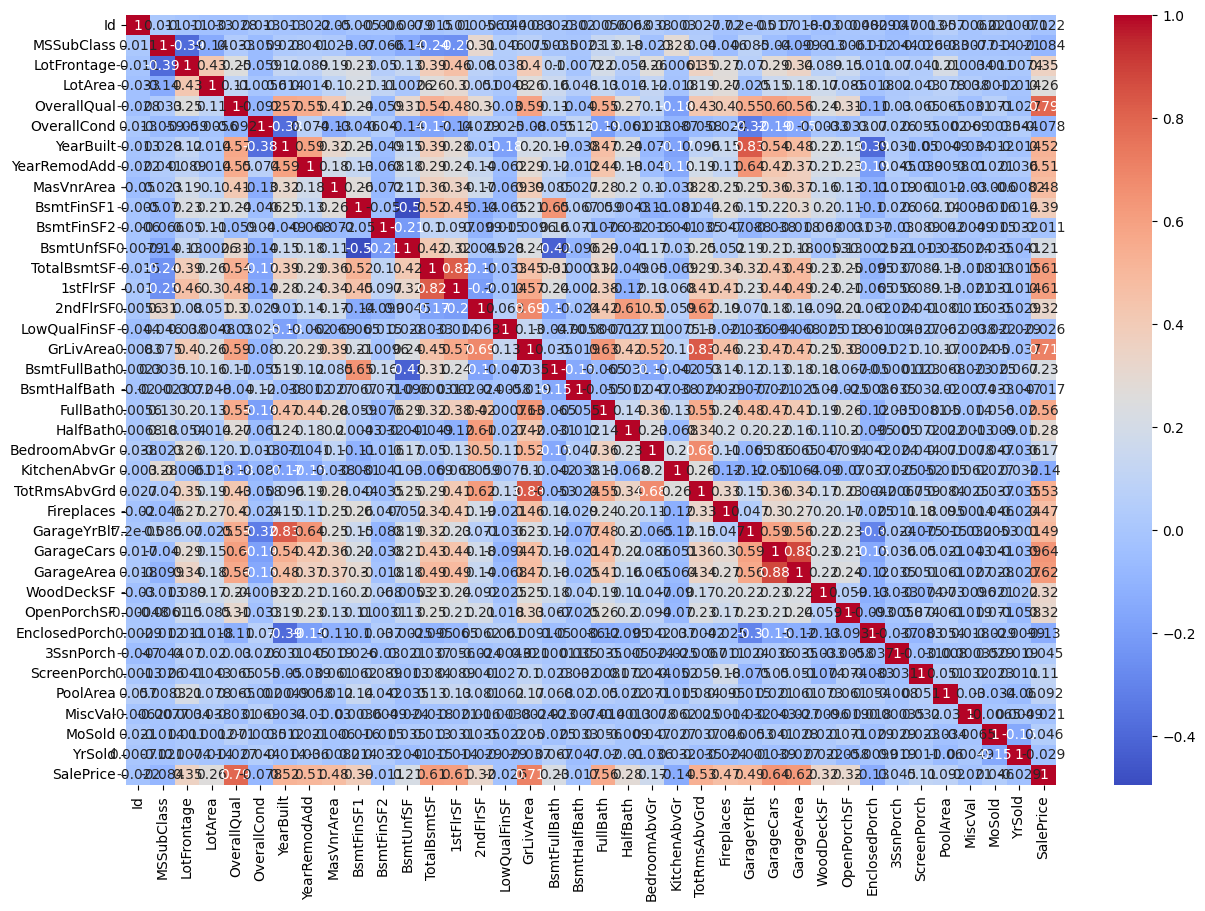

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

# Check the first few rows of the data
print("Data Head:")
print(train_df.head())

# Check for missing values in each column
print("\nMissing Values:")
print(train_df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(train_df.describe())

# Correlation matrix to see how features are correlated with the target variable
# Step 3: Plot the correlation matrix with only numeric features
plt.figure(figsize=(15, 10))

# Select only numeric columns for correlation
numeric_columns = train_df.select_dtypes(include=['number'])

# Compute and plot the correlation matrix
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()



In [ ]:
# Step 4: Data Cleaning

# Drop rows with missing values (you can also choose other strategies like filling the missing values)
train_df_clean = train_df.dropna()


In [ ]:
# Step 5: Feature Selection

# Select a subset of features that are highly correlated with the target variable (SalePrice)
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']

# Define the target variable (SalePrice)
target = 'SalePrice'


In [ ]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with the median
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# Now you can proceed with splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Perform one-hot encoding on categorical columns
X = pd.get_dummies(X, drop_first=True)

# Now split the data into training and testing sets again (after encoding)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values in the features
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Now train the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 20236.406098240743
Mean Squared Error: 2641205374.2309628
R-squared: 0.6556593157985715


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [ ]:
# Load the saved model
model = joblib.load('linear_regression_model.pkl')

# Use the model for predictions
y_pred = model.predict(X_test)


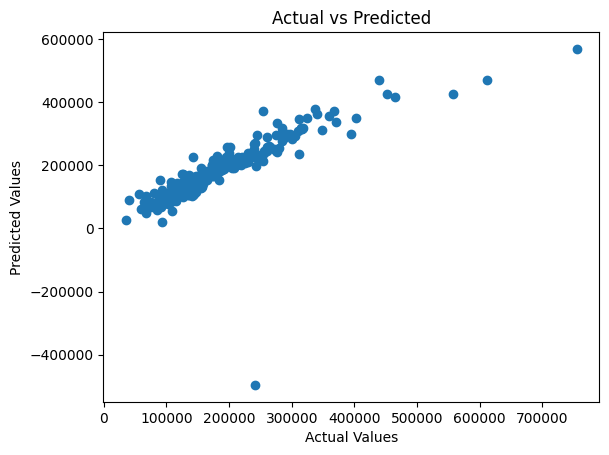

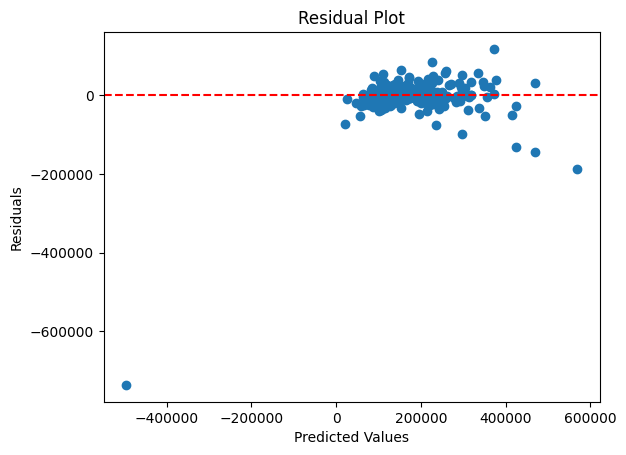

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Residual plot (Difference between actual and predicted)
plt.scatter(y_pred, y_pred - y_test)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [31]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_reviews(1).csv to sentiment_reviews(1) (1).csv


In [32]:
!pip install transformers
!pip install datasets scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [33]:
import pandas as pd
import csv

# Path to the uploaded CSV file
file_path = '/content/sentiment_reviews(1).csv'

# Try reading the CSV file with error handling and correct quoting
try:
    data = pd.read_csv(file_path, quoting=csv.QUOTE_MINIMAL, error_bad_lines=False)
except Exception as e:
    print(f"Error loading file: {e}")

# Display the first few rows of the dataset to check its content
data.head()


Error loading file: read_csv() got an unexpected keyword argument 'error_bad_lines'


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,text_data,processed_text,assigned_topic
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500.0,CollgCr,collgcr,2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500.0,Veenker,veenker,9
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500.0,CollgCr,collgcr,2
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000.0,Crawfor,crawfor,3
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000.0,NoRidge,noridge,4


In [34]:
# Open and inspect the raw content of the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Print the first few lines to inspect
for line in lines[:10]:
    print(line)


document_id	clean_text	sentiment

1	I bought the IPhone 14 Pro Max as my first IPhone coming from Android because I wanted to try it out, and it works well! I brought it to my carrier to transfer phone numbers, had some trouble setting it up at first but I figured it out on my own. Battery works just fine, charges up to 100% easily.	positive

2	It sucks to have to write a negative review about a bad experience with Amazon. I purchased this iPhone 14 Pro Max from Amazon Renewed, but received the wrong phone, and customer service was unhelpful. I had to pay extra for a replacement and it was very frustrating.	negative

3	I was really hoping I’d get to write a great review and I do!! This phone is fabulous! Like brand new. Not a scratch on it. The battery capacity is still 100% even though it’s a used phone. Overall, fantastic in every way.	positive

4	I purchased this iPhone 14 Pro Max from Amazon Renewed. The phone came with a couple of light scratches and a small dent but is in great c

In [35]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the pre-trained model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Print model architecture and number of parameters
print(f"Model Architecture: {model.config}")
print(f"Number of Parameters: {model.num_parameters()}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Model Architecture: DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.46.2",
  "vocab_size": 30522
}

Number of Parameters: 66955010


In [36]:
# Check the column names to ensure we're using the correct one for the text data
print(data.columns)
print(data.head())


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [39]:
from transformers import pipeline

# Initialize the sentiment-analysis pipeline using the pre-trained model
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


In [42]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Update the sentiment analyzer to run on the selected device
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0 if device.type == "cuda" else -1)

# Adjust batch size and split into batches
batch_size = 16  # Reduce batch size to improve processing time
processed_texts = data['processed_text'].tolist()
batches = [processed_texts[i:i + batch_size] for i in range(0, len(processed_texts), batch_size)]

# Initialize empty lists for predictions and confidences
predictions = []
confidences = []

# Process each batch
for i, batch in enumerate(batches):
    print(f"Processing batch {i + 1}/{len(batches)}...")  # Log progress
    results = sentiment_analyzer(batch)
    predictions.extend([res['label'] for res in results])
    confidences.extend([res['score'] for res in results])

# Add predictions and confidence scores to the dataset
data['prediction'] = predictions
data['confidence'] = confidences


Using device: cpu
Processing batch 1/183...
Processing batch 2/183...
Processing batch 3/183...
Processing batch 4/183...
Processing batch 5/183...
Processing batch 6/183...
Processing batch 7/183...
Processing batch 8/183...
Processing batch 9/183...
Processing batch 10/183...
Processing batch 11/183...
Processing batch 12/183...
Processing batch 13/183...
Processing batch 14/183...
Processing batch 15/183...
Processing batch 16/183...
Processing batch 17/183...
Processing batch 18/183...
Processing batch 19/183...
Processing batch 20/183...
Processing batch 21/183...
Processing batch 22/183...
Processing batch 23/183...
Processing batch 24/183...
Processing batch 25/183...
Processing batch 26/183...
Processing batch 27/183...
Processing batch 28/183...
Processing batch 29/183...
Processing batch 30/183...
Processing batch 31/183...
Processing batch 32/183...
Processing batch 33/183...
Processing batch 34/183...
Processing batch 35/183...
Processing batch 36/183...
Processing batch 37

In [43]:
# Use a subset of the data for testing
test_data = data.sample(100, random_state=42)  # Adjust the number as needed

# Process test data instead of the full dataset
processed_texts = test_data['processed_text'].tolist()
batches = [processed_texts[i:i + batch_size] for i in range(0, len(processed_texts), batch_size)]

# Initialize empty lists for predictions and confidences
predictions = []
confidences = []

# Process each batch
for i, batch in enumerate(batches):
    print(f"Processing batch {i + 1}/{len(batches)}...")  # Log progress
    results = sentiment_analyzer(batch)
    predictions.extend([res['label'] for res in results])
    confidences.extend([res['score'] for res in results])

# Add predictions and confidence scores to the dataset
test_data['prediction'] = predictions
test_data['confidence'] = confidences


Processing batch 1/7...
Processing batch 2/7...
Processing batch 3/7...
Processing batch 4/7...
Processing batch 5/7...
Processing batch 6/7...
Processing batch 7/7...


In [45]:
# Display the column names
print("Columns in the dataset:", data.columns)

# Display the first few rows to understand the structure
print(data.head())


Columns in the dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       '

In [48]:
# Step 1: Ensure both y_true and y_pred are strings
data['actual_label'] = data['actual_label'].astype(str)  # Ensure ground truth is string
data['prediction'] = data['prediction'].astype(str)      # Ensure predictions are string

# Step 2: Check for any missing or invalid values
print("Checking for missing values:")
print(data[['actual_label', 'prediction']].isnull().sum())

# Drop rows with missing values in either column (if any)
data = data.dropna(subset=['actual_label', 'prediction'])

# Step 3: Perform evaluation
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Extract the true and predicted labels
y_true = data['actual_label']
y_pred = data['prediction']

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Checking for missing values:
actual_label    0
prediction      0
dtype: int64

Evaluation Metrics:
Accuracy: 0.2110
Precision: 0.1578
Recall: 0.2110
F1-Score: 0.1696


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
# Save predictions along with actual labels and confidence scores
output_file = "sentiment_analysis_results.csv"
data[['processed_text', 'actual_label', 'prediction', 'confidence']].to_csv(output_file, index=False)
print(f"Results saved to {output_file}")


Results saved to sentiment_analysis_results.csv


In [50]:
# Filter rows where predictions do not match actual labels
misclassified = data[data['actual_label'] != data['prediction']]

# Show a few misclassified examples
print("\nMisclassified Examples:")
print(misclassified[['processed_text', 'actual_label', 'prediction', 'confidence']].head())



Misclassified Examples:
  processed_text actual_label prediction  confidence
5        mitchel          nan   POSITIVE    0.983189
6        somerst          nan   POSITIVE    0.896684
7         nwames          nan   POSITIVE    0.972452
8        oldtown          nan   NEGATIVE    0.978575
9        brkside          nan   POSITIVE    0.998501


Unique combined labels: ['NEGATIVE', 'POSITIVE', 'nan']


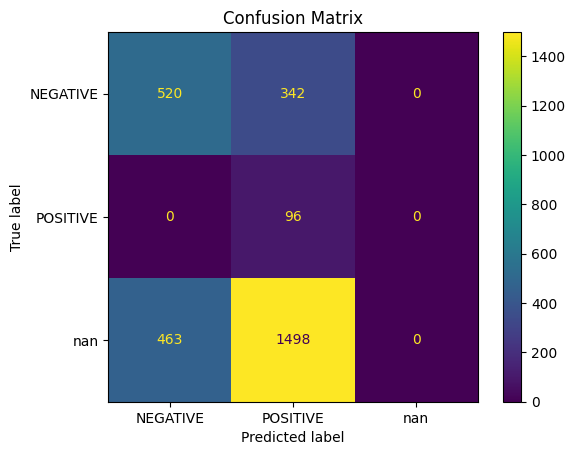

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Ensure labels are consistent
unique_labels = sorted(set(y_true.unique()) | set(y_pred.unique()))  # Combine unique values from both
print("Unique combined labels:", unique_labels)

# Plot confusion matrix with updated labels
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=unique_labels)
plt.title("Confusion Matrix")
plt.show()


In [53]:
# Save final results including predictions and confidence scores
output_file = "final_sentiment_analysis_results.csv"
data[['processed_text', 'actual_label', 'prediction', 'confidence']].to_csv(output_file, index=False)
print(f"Final results saved to {output_file}")


Final results saved to final_sentiment_analysis_results.csv
